In [24]:
import numpy as np
import random 
import matplotlib.pyplot as plt

Implementiamo una simulazione della dinamica della RNN con metodo Eulero implicito

la dinamica della rete è descitta dall'equazione: tau*dx_i/dt=-x_i(t)+sum(J_ij*r_j(t))+sum(B_ik*u_k(t)) con r_j(t)=tanh(x_i(t))

Setto i valori delle costanti come nell'articolo di Miconi e inizializzo le matrici ai valori iniziali

In [25]:
def trial(T=1500):
        
    u=np.zeros((T,2))
    
    y=np.zeros(T)
    
    stim1=np.random.randint(0,2) # random number, either 0 or 1
    stim2=np.random.randint(0,2) # random number, either 0 or 1
    
    u[:200,0]=-1+2*stim1
    u[400:600,1]=-1+2*stim2
    
    y[800:1000]=-1+2*np.mod(stim1+stim2,2)
    
    return u,y


def generate_trials(n_trials,T=1500):

    U = np.zeros((n_trials,T,2))
    Y = np.zeros((n_trials,T))
    
    for n in range(n_trials):
        
        u,y=trial()
        
        U[n,:,:]=u
        Y[n,:]=y

    return U,Y
        

In [26]:
N=200            #numero neuroni
M=2             #numero input
tau=30          #tempo di rilassamento
g=1.5           #early chaotic

dt=1.
T=1500
n_trials=10
tottime=T*n_trials
startstim1 = 1
timestim1 = 200
startstim2 = 400
timestim2 = 200

J=np.zeros((N,N))
deltaJ=np.zeros((N,N))  #### check initialization!!!
x=np.zeros((N,tottime))
r=np.zeros((N,tottime))
u=np.zeros((M,tottime))

E=np.zeros((N,N))#,tottime)) 

z=np.zeros(tottime)
B=np.zeros((N,M))

U,R = generate_trials(T=T,n_trials=n_trials)

u=np.reshape(U,(n_trials*T,2)).T


In [27]:
print(np.shape(x))
print(np.shape(z))
print(np.shape(u))

(200, 15000)
(15000,)
(2, 15000)


In [28]:
J = np.random.normal(0,g/np.sqrt(N),(N,N))

'''
for i in range(J.shape[0]): 
    for j in range(J.shape[1]):  
        J[i,j]=random.normalvariate(0,(g/np.sqrt(N)))
'''

B= -1+2*np.random.rand(N,M)

'''
for i in range(B.shape[0]): 
    for k in range(B.shape[1]):  
        B[i,k]=random.uniform(-1,1)
'''

x[:,0]=-0.1+0.2*np.random.rand(N)
r[:,0]=np.tanh(x[:,0])


'''
for i in range(x.shape[0]):
    x[i,0]=random.uniform(-0.1,0.1)
    r[i,0]=np.tanh(x[i,0])
'''

# 4 neuroni hanno un bias di +1 ????
# perturbazioni delta dove vanno messe ????

'\nfor i in range(x.shape[0]):\n    x[i,0]=random.uniform(-0.1,0.1)\n    r[i,0]=np.tanh(x[i,0])\n'

In [29]:
### noise

noise= np.zeros((N,tottime))
rate=3./1000

'''
for each neuron:
     for each time:
         extract random number r1 between 0 and 1
         if(r1<rate):
             noise=extrract rando mfrom -0.5 to 0.5
'''             

'\nfor each neuron:\n     for each time:\n         extract random number r1 between 0 and 1\n         if(r1<rate):\n             noise=extrract rando mfrom -0.5 to 0.5\n'

Uso metodo Eulero esplicito: tau*(x_i(t_n+1)-x_i(t))/dt=-x_i(t)+sum(J_ij*r_j(t))+sum(B_ik*u_k(t)) e ricavo x_i(tn+1)

Eulero implicito???

In [30]:
n_fixed=4

fixed_neurons = np.random.choice(N,n_fixed,replace=False)

non_fixed_neurons = np.delete(np.arange(N),fixed_neurons)

reading_neuron = np.random.choice(non_fixed_neurons,1)
reading_neuron = reading_neuron[0]


x[fixed_neurons,:]=1

b=dt/tau            #per semplicità definisco una nuova costante

for ntime in range(tottime-1):
    
    ##  r[i,ntime]=np.tanh(x[i,ntime]) no!!

    '''
    for i in range(x.shape[0]):
        r[i,ntime]=np.tanh(x[i,ntime])
    '''
    
    r[:,ntime]=np.tanh(x[:,ntime])
    
    sumJ=np.matmul(J,r[:,ntime])
        
    sumB=np.matmul(B,u[:,ntime])
    
    x[non_fixed_neurons,ntime+1]=x[non_fixed_neurons,ntime]*(1-b)+\
    b*sumB[non_fixed_neurons]+b*sumJ[non_fixed_neurons]      #ESPLICITO

    #   x[:,ntime+1]=x[:,ntime]/(1+b)+b/(1+b)*(sumJ+sumB)       #IMPLICITO

    z=x[reading_neuron,:]     

    
    ### modify E:

        
 #   if(np.mod(ntime,T)==T-1):
        ### compute average R over last trials
        ### compute Delta J
        ### compute
        
    '''
    for i in range(x.shape[0]):
        
        sumJ=0
        sumB=0
        for j in range(J.shape[1]):
            sumJ+=J[i,j]*r[j,ntime]
        for k in range(B.shape[1]):
            sumB+=B[i,k]*u[k,ntime]
    '''
        
        
            
        

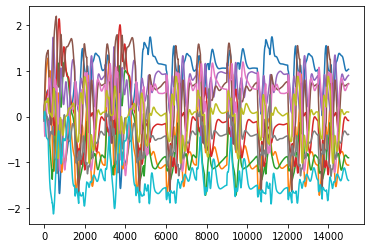

In [31]:
plt.plot(x[:10,:].T)
plt.show()

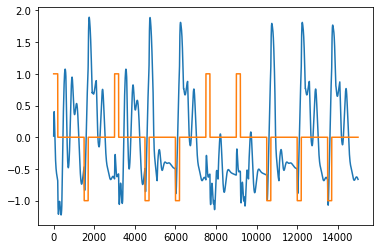

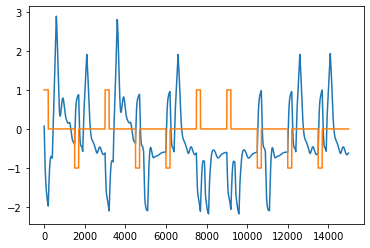

In [32]:
idx_max_input1 = np.argmax(B[:,0])

plt.plot(x[idx_max_input1,:])
plt.plot(u[0,:])

plt.figure()
plt.plot(x[idx_max_input1+1,:])
plt.plot(u[0,:])

c:\Users\angel\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


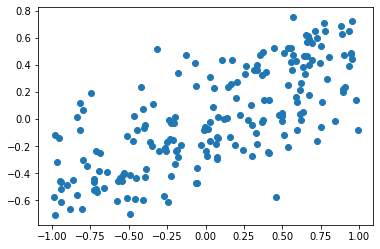

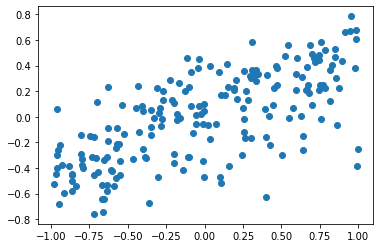

In [33]:
from scipy.stats import pearsonr

corr_input1 = np.zeros(N)
corr_input2 = np.zeros(N)

for i in range(N):
    corr_input1[i],p=pearsonr(u[0,:],x[i,:])
    corr_input2[i],p=pearsonr(u[1,:],x[i,:])
    
plt.figure()
plt.scatter(B[:,0],corr_input1)

plt.figure()
plt.scatter(B[:,1],corr_input2)